In [20]:
import os
import pandas as pd
import re

In [11]:
# funciones utiles

def check_cliente(txt, cliente):
    return cliente in txt

In [2]:
# cambiar url para leer los datos de otro subfolder con path relativo
os.chdir('../')

In [5]:
noticias = pd.read_csv('../datos/noticias.csv')
clientes = pd.read_csv('../datos/clientes.csv')
clientes_noticias = pd.read_csv('../datos/clientes_noticias.csv')

In [13]:
noticia = noticias.loc[1000,'news_text_content'].lower()
noticia = noticia.split(' ')
empresa = clientes.loc[]

['cuatrecasas',
 'ha',
 'asesorado',
 'a',
 'tikehau',
 'ace',
 'capital',
 ',',
 'gestora',
 'de',
 'private',
 'equity',
 'filial',
 'de',
 'tikehau',
 'capital',
 ',',
 'en',
 'su',
 'acuerdo',
 'para',
 'adquirir',
 'la',
 'totalidad',
 'del',
 'capital',
 'de',
 'acatec,',
 'empresa',
 'de',
 'mecanizado',
 'de',
 'precision',
 'para',
 'la',
 'industria',
 'aeronautica.',
 'esta',
 'sera',
 'la',
 'primera',
 'operacion',
 'de',
 'tikehau',
 'ace',
 'capital,',
 'realizada',
 'a',
 'traves',
 'de',
 'ace',
 'aerofondo',
 'iv',
 'fcr',
 '(con',
 'indra,',
 'airbus,',
 'sepides',
 'y',
 'tikehau',
 'capital',
 'como',
 'inversores),',
 'cuya',
 'finalidad',
 'es',
 'invertir',
 'en',
 'empresas',
 'activas',
 'del',
 'sector',
 'aeroespacial',
 'y',
 'de',
 'defensa',
 'espanol,',
 'con',
 'objeto',
 'de',
 'consolidarlo',
 'y',
 'reforzarlo.',
 'tras',
 'treinta',
 'anos',
 'dedicada',
 'a',
 'la',
 'fabricacion',
 'de',
 'piezas',
 'de',
 'alta',
 'precision',
 'para',
 'aviacion

In [14]:
clientes.columns

Index(['nit', 'nombre', 'desc_ciiu_division', 'desc_ciuu_grupo',
       'desc_ciiuu_clase', 'subsec'],
      dtype='object')

In [24]:
clientes['nombre_editado'] = clientes['nombre'].str.lower()
clientes['val_nombre_editado'] = clientes['nombre_editado'].apply(lambda x: bool(re.findall('davivienda',x)))

In [25]:
clientes[clientes['val_nombre_editado']]

,nit,nombre,desc_ciiu_division,desc_ciuu_grupo,desc_ciiuu_clase,subsec,nombre_editado,val_nombre_editado
956,860034313,BANCO DAVIVIENDA SA,"ACTIVIDADES DE SERVICIOS FINANCIEROS, EXCEPTO ...",INTERMEDIACION MONETARIA,BANCOS COMERCIALES,BANCOS,banco davivienda sa,True
980,800182281,FIDUCIARIA DAVIVIENDA SA,"ACTIVIDADES DE SERVICIOS FINANCIEROS, EXCEPTO ...","FIDEICOMISOS, FONDOS (INCLUYE FONDOS DE CESANT...","FIDEICOMISOS, FONDOS Y ENTIDADES FINANCIERAS S...",FIDUCIARIAS,fiduciaria davivienda sa,True
1090,860079174,CORREDORES DAVIVIENDA SA COMISIONISTA DE BOLSA,ACTIVIDADES AUXILIARES DE LAS ACTIVIDADES DE S...,ACTIVIDADES AUXILIARES DE LAS ACTIVIDADES DE S...,CORRETAJE DE VALORES Y DE CONTRATOS DE PRODUCT...,COMISIONISTAS DE BOLSA,corredores davivienda sa comisionista de bolsa,True


In [26]:
noticias.columns

Index(['news_id', 'news_url_absolute', 'news_init_date', 'news_final_date',
       'news_title', 'news_text_content'],
      dtype='object')

In [159]:
noticias['nombre_editado'] = noticias['news_text_content'].str.lower()
noticias['val_nombre_editado'] = noticias['nombre_editado'].apply(lambda x: bool(re.findall('eps',x)))

In [160]:
davi = noticias[noticias['val_nombre_editado']].copy()

In [161]:
davi = davi.merge(clientes_noticias, on = 'news_id', how = 'left')

In [162]:
davi

,news_id,news_url_absolute_x,news_init_date_x,news_final_date_x,news_title,news_text_content,nombre_editado,val_nombre_editado,nit,news_url_absolute_y,news_init_date_y,news_final_date_y
0,news10142,https://www.diariodemallorca.es/economia/2022/...,2022-07-30,2022-08-14,?Cuales son las grandes empresas espanolas que...,"Mientras, el balance comercial fue positivo po...","mientras, el balance comercial fue positivo po...",True,900628110,https://www.diariodemallorca.es/economia/2022/...,2022-07-30,2022-08-14
1,news10142,https://www.diariodemallorca.es/economia/2022/...,2022-07-30,2022-08-14,?Cuales son las grandes empresas espanolas que...,"Mientras, el balance comercial fue positivo po...","mientras, el balance comercial fue positivo po...",True,901538753,https://www.diariodemallorca.es/economia/2022/...,2022-07-30,2022-08-14
2,news10142,https://www.diariodemallorca.es/economia/2022/...,2022-07-30,2022-08-14,?Cuales son las grandes empresas espanolas que...,"Mientras, el balance comercial fue positivo po...","mientras, el balance comercial fue positivo po...",True,900115530,https://www.diariodemallorca.es/economia/2022/...,2022-07-30,2022-08-14
3,news10142,https://www.diariodemallorca.es/economia/2022/...,2022-07-30,2022-08-14,?Cuales son las grandes empresas espanolas que...,"Mientras, el balance comercial fue positivo po...","mientras, el balance comercial fue positivo po...",True,899999044,https://www.diariodemallorca.es/economia/2022/...,2022-07-30,2022-08-14
4,news10142,https://www.diariodemallorca.es/economia/2022/...,2022-07-30,2022-08-14,?Cuales son las grandes empresas espanolas que...,"Mientras, el balance comercial fue positivo po...","mientras, el balance comercial fue positivo po...",True,860013809,https://www.diariodemallorca.es/economia/2022/...,2022-07-30,2022-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,news99436,https://www.radionacional.co/actualidad/salud/...,2022-07-15,2022-07-30,Elevan a alta la alerta por viruela del mono e...,"El ministro de Salud, Fernando Ruiz , anuncio ...","el ministro de salud, fernando ruiz , anuncio ...",True,900219866,https://www.radionacional.co/actualidad/salud/...,2022-07-15,2022-07-30
2010,news99436,https://www.radionacional.co/actualidad/salud/...,2022-07-15,2022-07-30,Elevan a alta la alerta por viruela del mono e...,"El ministro de Salud, Fernando Ruiz , anuncio ...","el ministro de salud, fernando ruiz , anuncio ...",True,800126785,https://www.radionacional.co/actualidad/salud/...,2022-07-15,2022-07-30
2011,news99591,https://www.bloomberglinea.com/2022/08/07/auge...,2022-07-30,2022-08-14,Auge de juegos de azar en Twitch esta atrayend...,"Bloomberg -- Para Enneric Chabot, de 26 anos, ...","bloomberg -- para enneric chabot, de 26 anos, ...",True,860037234,https://www.bloomberglinea.com/2022/08/07/auge...,2022-07-30,2022-08-14
2012,news99591,https://www.bloomberglinea.com/2022/08/07/auge...,2022-07-30,2022-08-14,Auge de juegos de azar en Twitch esta atrayend...,"Bloomberg -- Para Enneric Chabot, de 26 anos, ...","bloomberg -- para enneric chabot, de 26 anos, ...",True,899999270,https://www.bloomberglinea.com/2022/08/07/auge...,2022-07-30,2022-08-14


In [58]:
davi.loc[1,'news_text_content']

'No hay nada mas permanente que lo temporal y asi ocurrio con el impuesto del 4 x 1.000 con el que se gravaron algunas operaciones financieras. Aunque multiples veces se han radicado proyectos de ley en el Congreso de la Republica para desmontarlo, hasta el momento ninguno ha tenido exito y ya tiene 24 anos de vigencia en Colombia. Este impuesto, tambien conocido como gravamen a los movimientos financieros (GMF), nacio para hacerle frente a la crisis bancaria por la que estaba pasando el pais en 1998 y, en ese entonces, se esperaba que su vigencia fuera solo por un ano. Sin embargo, su eliminacion se fue postergando con el pasar de los anos porque se convirtio en una fuente de financiacion para la reconstruccion de zonas afectadas por el terremoto del Eje Cafetero (1999) y ayudo a enfrentar la crisis de 2014 por el desplome de los precios de petroleo, que afecto fuertemente los ingresos de la nacion. Al parecer, despues de 24 anos de vigencia este impuesto podria llegar a su fin en Col

In [163]:
clientes[clientes['nit'].isin(list(davi['nit'].unique()))]

,nit,nombre,desc_ciiu_division,desc_ciuu_grupo,desc_ciiuu_clase,subsec,nombre_editado,val_nombre_editado,ultima_palabra_nombre,nombre_clean
0,805027024,SUPERMERCADO LA GRAN COLOMBIA SA,ELABORACION DE PRODUCTOS ALIMENTICIOS,"PROCESAMIENTO Y CONSERVACION DE CARNE, PESCADO...",PROCESAMIENTO Y CONSERVACION DE CARNE Y PRODUC...,CARNES FRIAS,supermercado la gran colombia sa,False,COLOMBIA,SUPERMERCADO LA GRAN COLOMBIA
3,900319372,RED CARNICA SAS,ELABORACION DE PRODUCTOS ALIMENTICIOS,"PROCESAMIENTO Y CONSERVACION DE CARNE, PESCADO...",PROCESAMIENTO Y CONSERVACION DE CARNE Y PRODUC...,CARNES FRIAS,red carnica sas,False,CARNICA,RED CARNICA
8,890102110,OLEOFLORES SAS,ELABORACION DE PRODUCTOS ALIMENTICIOS,ELABORACION DE ACEITES Y GRASAS DE ORIGEN VEGE...,ELABORACION DE ACEITES Y GRASAS DE ORIGEN VEGE...,GRASAS Y ACEITES,oleoflores sas,False,OLEOFLORES,OLEOFLORES
9,890200656,PALMAS DEL CESAR SA,ELABORACION DE PRODUCTOS ALIMENTICIOS,ELABORACION DE ACEITES Y GRASAS DE ORIGEN VEGE...,ELABORACION DE ACEITES Y GRASAS DE ORIGEN VEGE...,GRASAS Y ACEITES,palmas del cesar sa,False,CESAR,PALMAS DEL CESAR
10,804017043,EXTRACTORA CENTRAL SA,ELABORACION DE PRODUCTOS ALIMENTICIOS,ELABORACION DE ACEITES Y GRASAS DE ORIGEN VEGE...,ELABORACION DE ACEITES Y GRASAS DE ORIGEN VEGE...,GRASAS Y ACEITES,extractora central sa,False,CENTRAL,EXTRACTORA CENTRAL
...,...,...,...,...,...,...,...,...,...,...
1491,860032463,PERENCO COLOMBIA LIMITED,EXTRACCION DE PETROLEO CRUDO Y GAS NATURAL,EXTRACCION DE PETROLEO CRUDO,EXTRACCION DE PETROLEO CRUDO,EXTRACCION DE PETROLEO,perenco colombia limited,False,COLOMBIA,PERENCO COLOMBIA
1493,890914525,MINEROS SA,EXTRACCION DE MINERALES METALIFEROS,EXTRACCION DE MINERALES METALIFEROS NO FERROSOS,EXTRACCION DE ORO Y OTROS METALES PRECIOSOS,OTRAS ACTIVIDADES MINERAS,mineros sa,False,MINEROS,MINEROS
1494,860069378,CERRO MATOSO SA,EXTRACCION DE MINERALES METALIFEROS,EXTRACCION DE MINERALES METALIFEROS NO FERROSOS,EXTRACCION DE MINERALES DE NIQUEL,OTRAS ACTIVIDADES MINERAS,cerro matoso sa,False,MATOSO,CERRO MATOSO
1495,811000761,MINERA EL ROBLE SA MINER SA,EXTRACCION DE MINERALES METALIFEROS,EXTRACCION DE MINERALES METALIFEROS NO FERROSOS,EXTRACCION DE MINERALES DE NIQUEL,OTRAS ACTIVIDADES MINERAS,minera el roble sa miner sa,False,MINER,MINERA EL ROBLE MINER


In [166]:
x = davi[davi['nit']==805027024].copy().reset_index()
x.loc[0,'news_url_absolute_x'] # news_url_absolute_x, news_title, news_text_content	

'https://elmeridiano.co/celebracion-de-aniversario-con-descuentos-y-eventos/'

In [179]:
lista_companias_filtro = ["CORP",'PLC','EPS','CI','SCA','INC','P.A.C','GROUP','SA','SAS','LTDA','LTD','LIMITED','ESP','SOCIEDAD','LP','BV','BIC']

In [180]:
def limpia_cadena_nombre(text,lista_filtro):
    lista_nombre = text.split(' ')
    nombre_final = [word for word in lista_nombre if word not in lista_filtro]
    return ' '.join(nombre_final)

In [187]:
clientes['nombre_clean'] = clientes['nombre'].apply(lambda x: x.replace('.',''))
clientes['nombre_clean'] = clientes['nombre_clean'].apply(lambda x: limpia_cadena_nombre(x,lista_companias_filtro))
clientes['long_nombre'] = clientes['nombre_clean'].apply(lambda x: len(x))
clientes['palabras_nombre'] = clientes['nombre_clean'].apply(lambda x: len(x.split(' ')))

<AxesSubplot: >

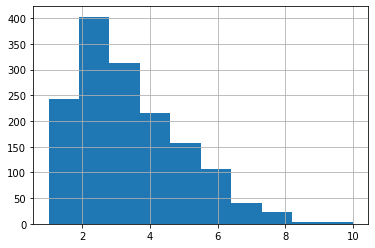

In [188]:
clientes['palabras_nombre'].hist()

In [199]:
texto = 'hola y chao, charry'
len(re.findall(r'(y+.)',texto))

1

In [204]:
clientes['val_regex'] = clientes['nombre_clean'].apply(lambda x: len(re.findall(r'(o+.)',x.lower()))>0)
clientes[clientes['val_regex']]

,nit,nombre,desc_ciiu_division,desc_ciuu_grupo,desc_ciiuu_clase,subsec,nombre_editado,val_nombre_editado,ultima_palabra_nombre,nombre_clean,long_nombre,palabras_nombre,val_regex
0,805027024,SUPERMERCADO LA GRAN COLOMBIA SA,ELABORACION DE PRODUCTOS ALIMENTICIOS,"PROCESAMIENTO Y CONSERVACION DE CARNE, PESCADO...",PROCESAMIENTO Y CONSERVACION DE CARNE Y PRODUC...,CARNES FRIAS,supermercado la gran colombia sa,False,COLOMBIA,SUPERMERCADO LA GRAN COLOMBIA,29,4,True
2,801004045,DON POLLO SAS,ELABORACION DE PRODUCTOS ALIMENTICIOS,"PROCESAMIENTO Y CONSERVACION DE CARNE, PESCADO...",PROCESAMIENTO Y CONSERVACION DE CARNE Y PRODUC...,CARNES FRIAS,don pollo sas,False,POLLO,DON POLLO,9,2,True
5,800072556,SEATECH INTERNATIONAL INC,ELABORACION DE PRODUCTOS ALIMENTICIOS,"PROCESAMIENTO Y CONSERVACION DE CARNE, PESCADO...","PROCESAMIENTO Y CONSERVACION DE PESCADOS, CRUS...",CARNES FRIAS,seatech international inc,False,INTERNATIONAL,SEATECH INTERNATIONAL,21,2,True
6,802011109,GRUPO ALIMENTARIO DEL ATLANTICO SA,ELABORACION DE PRODUCTOS ALIMENTICIOS,"PROCESAMIENTO Y CONSERVACION DE CARNE, PESCADO...","PROCESAMIENTO Y CONSERVACION DE PESCADOS, CRUS...",CARNES FRIAS,grupo alimentario del atlantico sa,False,ATLANTICO,GRUPO ALIMENTARIO DEL ATLANTICO,31,4,True
7,800208785,CONGELADOS AGRICOLAS SA CONGELAGRO SA,ELABORACION DE PRODUCTOS ALIMENTICIOS,"PROCESAMIENTO Y CONSERVACION DE FRUTAS, LEGUMB...","PROCESAMIENTO Y CONSERVACION DE FRUTAS, LEGUMB...",CONSERVAS,congelados agricolas sa congelagro sa,False,CONGELAGRO,CONGELADOS AGRICOLAS CONGELAGRO,31,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,800230209,WEATHERFORD COLOMBIA LIMITED,ACTIVIDADES DE SERVICIOS DE APOYO PARA LA EXPL...,ACTIVIDADES DE APOYO PARA LA EXTRACCION DE PET...,ACTIVIDADES DE APOYO PARA LA EXTRACCION DE PET...,EXTRACCION DE PETROLEO,weatherford colombia limited,False,COLOMBIA,WEATHERFORD COLOMBIA,20,2,True
1502,890209174,ISMOCOL SA,ACTIVIDADES DE SERVICIOS DE APOYO PARA LA EXPL...,ACTIVIDADES DE APOYO PARA LA EXTRACCION DE PET...,ACTIVIDADES DE APOYO PARA LA EXTRACCION DE PET...,EXTRACCION DE PETROLEO,ismocol sa,False,ISMOCOL,ISMOCOL,7,1,True
1503,830069311,NABORS DRILLING INTERNATIONAL LTD BERMUDA,ACTIVIDADES DE SERVICIOS DE APOYO PARA LA EXPL...,ACTIVIDADES DE APOYO PARA LA EXTRACCION DE PET...,ACTIVIDADES DE APOYO PARA LA EXTRACCION DE PET...,EXTRACCION DE PETROLEO,nabors drilling international ltd bermuda,False,BERMUDA,NABORS DRILLING INTERNATIONAL BERMUDA,37,4,True
1504,830130106,SOENERGY INTERNATIONAL COLOMBIA SAS,ACTIVIDADES DE SERVICIOS DE APOYO PARA LA EXPL...,ACTIVIDADES DE APOYO PARA LA EXTRACCION DE PET...,ACTIVIDADES DE APOYO PARA LA EXTRACCION DE PET...,GAS,soenergy international colombia sas,False,COLOMBIA,SOENERGY INTERNATIONAL COLOMBIA,31,3,True


In [171]:
clientes['ultima_palabra_nombre'] = clientes['nombre_clean'].apply(lambda x: x.split(' ')[-1])
# clientes['ultima_palabra_nombre'] = clientes['ultima_palabra_nombre'].apply(lambda x: x.replace('.',''))

In [172]:
x = clientes['ultima_palabra_nombre'].value_counts().reset_index()
x['ponderacion'] = round(x['ultima_palabra_nombre']/x['ultima_palabra_nombre'].sum()*100,2)
x['suma_acumulada'] = x['ponderacion'].cumsum()

In [173]:
x.shape

(940, 4)

In [176]:
x.head(30)

,index,ultima_palabra_nombre,ponderacion,suma_acumulada
0,COLOMBIA,254,16.85,16.85
1,A,25,1.66,18.51
2,BOGOTA,15,1.00,19.51
3,CIA,14,0.93,20.44
4,SEGUROS,12,0.80,21.24
5,S,11,0.73,21.97
6,BOLSA,10,0.66,22.63
7,COLOMBIANA,9,0.60,23.23
8,CONSTRUCCIONES,8,0.53,23.76
9,SANTANDER,7,0.46,24.22


In [158]:
clientes[clientes['ultima_palabra_nombre']=='EPS']

,nit,nombre,desc_ciiu_division,desc_ciuu_grupo,desc_ciiuu_clase,subsec,nombre_editado,val_nombre_editado,ultima_palabra_nombre,nombre_clean
1295,900604350,ALIANZA MEDELLIN ANTIOQUIA EPS S.A.S.,ADMINISTRACION PUBLICA Y DEFENSA; PLANES DE SE...,ACTIVIDADES DE PLANES DE SEGURIDAD SOCIAL DE A...,ACTIVIDADES DE PLANES DE SEGURIDAD SOCIAL DE A...,EPS Y SALUD PREPAGADA (SALUD),alianza medellin antioquia eps s.a.s.,False,EPS,ALIANZA MEDELLIN ANTIOQUIA EPS
1311,901093846,EMPRESA PROMOTORA DE SALUD ECOOPSOS EPS S.A.S.,ADMINISTRACION PUBLICA Y DEFENSA; PLANES DE SE...,ACTIVIDADES DE PLANES DE SEGURIDAD SOCIAL DE A...,ACTIVIDADES DE PLANES DE SEGURIDAD SOCIAL DE A...,EPS Y SALUD PREPAGADA (SALUD),empresa promotora de salud ecoopsos eps s.a.s.,False,EPS,EMPRESA PROMOTORA DE SALUD ECOOPSOS EPS
1371,899999092,INSTITUTO NACIONAL DE CANCEROLOGIA EPS,ACTIVIDADES DE ATENCION DE LA SALUD HUMANA,"ACTIVIDADES DE HOSPITALES Y CLINICAS, CON INTE...","ACTIVIDADES DE HOSPITALES Y CLINICAS, CON INTE...",IPS,instituto nacional de cancerologia eps,False,EPS,INSTITUTO NACIONAL DE CANCEROLOGIA EPS


In [89]:
clientes_noticias[clientes_noticias['nit']==830129277]

,nit,news_id,news_url_absolute,news_init_date,news_final_date
869,830129277,news11156,https://www.bnamericas.com/es/noticias/colombi...,2022-07-30,2022-08-14
3170,830129277,news13694,https://www.bnamericas.com/es/noticias/en-juli...,2022-07-30,2022-08-14
3209,830129277,news13709,https://www.bnamericas.com/es/noticias/colombi...,2022-07-30,2022-08-14
3221,830129277,news13711,https://www.bnamericas.com/es/noticias/colombi...,2022-07-30,2022-08-14
3301,830129277,news13721,https://www.bnamericas.com/es/noticias/panoram...,2022-07-15,2022-07-30
3712,830129277,news14271,https://www.bnamericas.com/es/noticias/celsia-...,2022-07-15,2022-07-30
4693,830129277,news14869,https://www.dclm.es/noticias/118157/las-empres...,2022-07-15,2022-07-30
5702,830129277,news15439,https://www.bnamericas.com/es/noticias/epm-mod...,2022-07-30,2022-08-14
5718,830129277,news15442,https://www.bnamericas.com/es/noticias/epm-amp...,2022-07-15,2022-07-30
6881,830129277,news16324,https://www.bnamericas.com/es/noticias/superse...,2022-07-30,2022-08-14


In [99]:
clientes_noticias.loc[52177,'news_url_absolute']

'https://paralelo32.com.ar/la-seleccion-femenina-va-por-la-clasificacion-directa-al-mundial-ante-colombia/'